In [1]:
from data import *
from tree_faster import FaceTree
import time

Keypoints shape:  (2140, 5, 2)
Number of images:  2140
Number of training images:  1498
Number of test images:  642


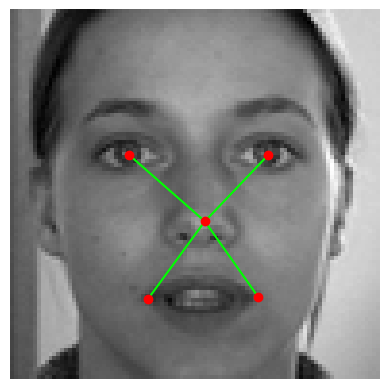

In [2]:
# load data
# keypoints, images = processFacesData("training.csv")
keypoints, images = readFacesData("training.csv")
keypoints = keypoints[:, [0, 1, 10, 11, 12], :]
print("Keypoints shape: ", keypoints.shape)
numImages = images.shape[0]
print("Number of images: ", numImages)
numTrain = int(numImages * 0.7)
numTest = numImages - numTrain
print("Number of training images: ", numTrain)
print("Number of test images: ", numTest)
numPoints = 15

trainImages = images[:numTrain]
testImages = images[numTrain:]
trainKeypoints = keypoints[:numTrain]
testKeypoints = keypoints[numTrain:]
# edges = calculateEdges(trainKeypoints)
edges = [(0, 2), (1, 2), (2, 3), (2, 4)]

imNum = 12
visualizeFaceGraph(keypoints[imNum], images[imNum], edges)

In [3]:
# train
time1 = time.time()
t = FaceTree(edges, 2)
t.train(trainImages, trainKeypoints)
time2 = time.time()
print("Training time: ", time2 - time1)

Training time:  72.26015639305115


In [6]:
time1 = time.time()
error = t.evaluate(testImages, testKeypoints)
time2 = time.time()
print("Accuracy: ", error)
print("Evaluation time: ", time2 - time1)
print("Evaluation time per image: ", (time2 - time1) / numTest)
# save accuracies with numpy
np.save("errors.npy", error)


Evaluating on 642 images
Accuracy:  [array([[18.30093617, -1.88221277],
       [15.50331915, -2.0333617 ],
       [11.84953191, -2.47319149],
       [ 1.98638298, -1.76      ],
       [ 2.50144681,  3.21838298]]), array([[-1.57276596, -7.46008511],
       [-1.91455319, -1.01038298],
       [-0.40204255, -0.32068085],
       [-2.58587234,  0.88170213],
       [-4.46570213,  1.45157447]]), array([[-2.96993103, -0.23006897],
       [-5.83977931, -1.7737931 ],
       [-2.47834483, -2.82824828],
       [-1.6224    ,  2.50791724],
       [-1.6224    , -4.94708966]]), array([[18.29208054, 23.68397315],
       [16.19855034, 22.79065772],
       [14.75318121, 24.81138255],
       [13.46663087, 28.60832215],
       [16.00837584, 29.01444295]]), array([[ 1.43918577e+01, -9.39501780e-03],
       [-1.60814235e+00,  1.66565125e+00],
       [-3.09232740e+00,  4.22918149e+00],
       [ 4.62918149e-02,  3.41551601e+00],
       [-5.76512455e-01, -1.13645552e+00]]), array([[11.18498969,  8.30037113],
   

In [7]:
import pandas as pd
errors = np.stack(error)
print(errors.shape)
print(np.linalg.norm(errors, axis=2).shape)
errors = np.mean(np.linalg.norm(errors, axis=2), axis=0)
print("Mean error: ", errors)
print("Mean error: ", np.mean(errors))
xx = [0, 1, 10, 11, 12]
keys = pd.read_csv("training.csv").keys()
for i in range(5):
    # print with 3 digits
    print(keys[xx[i] * 2], ":", "{:.3f}".format(errors[i]))

(642, 5, 2)
(642, 5)
Mean error:  [20.39031559 19.86145898 20.39756934 19.03085132 19.92702633]
Mean error:  19.921444311979755
left_eye_center_x : 20.390
right_eye_center_x : 19.861
nose_tip_x : 20.398
mouth_left_corner_x : 19.031
mouth_right_corner_x : 19.927


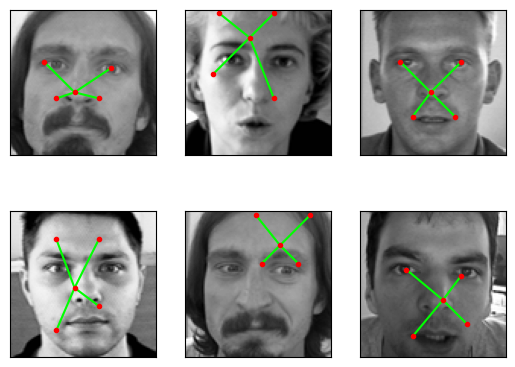

In [4]:
# predict on training images and visualize in 2 * 3 grid
locations = []
for i in range(6):
    im = trainImages[i]
    locations.append(t.predict(im))
images = trainImages[:6]
locations = np.stack(locations)
visualizeFaceGraphs(locations, images, edges)

(6, 5, 2)
Mean error:  [ 2.14736    22.28227879  1.34915872  2.91495914  2.20653617  2.68199724]


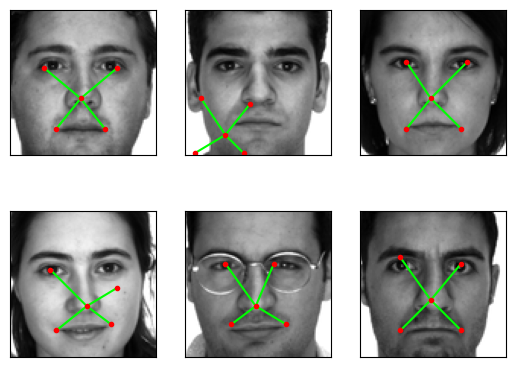

In [5]:
# predict on test images and visualize in 2 * 3 grid
choose = [7, 10, 13, 15, 1, 2]
locations = []
for i in [7, 10, 13, 15, 1, 2]:
    im = testImages[i]
    locations.append(t.predict(im))
images = testImages[[7, 10, 13, 15, 1, 2]]
locations = np.stack(locations)
keypoints = testKeypoints[[7, 10, 13, 15, 1, 2]]
diff = np.abs(locations - keypoints)
print(diff.shape)
diff = np.mean(diff, axis=(1, 2))
print("Mean error: ", diff)
visualizeFaceGraphs(locations, images, edges)